# Predicting next remaining burst time in hybrid scheduling algorithm

In [1]:
dict_os={'name':[],'id':[],'burst_time':[],'arrival_time':[]}

In [2]:
import psutil
# Iterate over all running process
for proc in psutil.process_iter():
    try:
        # Get process name & pid from process object.
        processName = proc.name()
        cpu_time = proc.cpu_times()
        processID = proc.pid
        dict_os['name'].append(processName)
        dict_os['id'].append(processID)
        dict_os['burst_time'].append(round(cpu_time[0]+cpu_time[1]))
        dict_os['arrival_time'].append(0)
    except (psutil.NoSuchProcess, psutil.AccessDenied, psutil.ZombieProcess):
        pass

In [3]:
import pandas as pd
df=pd.DataFrame(dict_os)
df.drop_duplicates('name',keep='first',inplace=True)
df=df[(df['burst_time']<50) & (df['burst_time']>10)]
df

,name,id,burst_time,arrival_time
3,svchost.exe,424,37,0
9,services.exe,896,15,0
12,lsass.exe,1020,14,0
65,spoolsv.exe,3920,15,0
77,sihost.exe,4332,17,0
83,Lavasoft.WCAssistant.WinService.exe,4472,13,0
103,aswEngSrv.exe,6376,28,0
107,ACCStd.exe,6980,25,0
122,ctfmon.exe,7648,23,0
131,SkypeBridge.exe,8532,21,0


In [4]:
name_columns=[]
for i in range(len(df['name'].tolist())):
    name_columns.append(f'p{i}')
name_columns
df['name']=name_columns
df.reset_index(drop=True)

,name,id,burst_time,arrival_time
0,p0,424,37,0
1,p1,896,15,0
2,p2,1020,14,0
3,p3,3920,15,0
4,p4,4332,17,0
5,p5,4472,13,0
6,p6,6376,28,0
7,p7,6980,25,0
8,p8,7648,23,0
9,p9,8532,21,0


In [5]:
process_names = df['name'].tolist()
burst_times = df['burst_time'].tolist()

In [6]:
n = len(process_names)
time_quantum  = 2

In [7]:
rem_brst_time_list = []
rem_bt_it_list = []

In [8]:
def create_rem_brst_time_list(n):
    for i in range(n):
        rem_brst_time_list.append([])

In [9]:
def find_rem_wt_time(n, bt, quantum):  
    rem_bt = [0] * n
    for i in range(n):  
        rem_bt[i] = bt[i] 
    while(1):
        done = True
        for i in range(n):  
            if (rem_bt[i] > 0):
                done = False
                if (rem_bt[i] > quantum): 
                    # Decrease the burst_time of current process by quantum  
                    rem_bt[i] -= quantum
                    rem_brst_time_list[i].append(rem_bt[i])
                else:
                    rem_bt[i] = 0
        if (done == True): 
            break

In [10]:
def create_rem_it_list(train_data, min_length):
    for i in range(min_length):
        rem_bt_it_list.append([val[i] for val in train_data])

In [11]:
def main():
    create_rem_brst_time_list(n)
    find_rem_wt_time(n, burst_times, time_quantum)
    min_length = min([len(val) for val in rem_brst_time_list])
    train_data = [val[:min_length] for val in rem_brst_time_list]
    create_rem_it_list(train_data, min_length)
    return train_data,min_length

In [12]:
train_data,min_length = main()

In [13]:
rem_bt_it_list

[[35, 13, 12, 13, 15, 11, 26, 23, 21, 19, 15, 12, 20, 9],
 [33, 11, 10, 11, 13, 9, 24, 21, 19, 17, 13, 10, 18, 7],
 [31, 9, 8, 9, 11, 7, 22, 19, 17, 15, 11, 8, 16, 5],
 [29, 7, 6, 7, 9, 5, 20, 17, 15, 13, 9, 6, 14, 3],
 [27, 5, 4, 5, 7, 3, 18, 15, 13, 11, 7, 4, 12, 1]]

In [14]:
# take only four iterations 
for i in range(4):
    df[f'remaining_burst_time_{i+1}'] = rem_bt_it_list[i]

In [15]:
df.reset_index(drop=True)

,name,id,burst_time,arrival_time,remaining_burst_time_1,remaining_burst_time_2,remaining_burst_time_3,remaining_burst_time_4
0,p0,424,37,0,35,33,31,29
1,p1,896,15,0,13,11,9,7
2,p2,1020,14,0,12,10,8,6
3,p3,3920,15,0,13,11,9,7
4,p4,4332,17,0,15,13,11,9
5,p5,4472,13,0,11,9,7,5
6,p6,6376,28,0,26,24,22,20
7,p7,6980,25,0,23,21,19,17
8,p8,7648,23,0,21,19,17,15
9,p9,8532,21,0,19,17,15,13


In [16]:
# ml linear regression to predict next remaining burst time 

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
# EDA

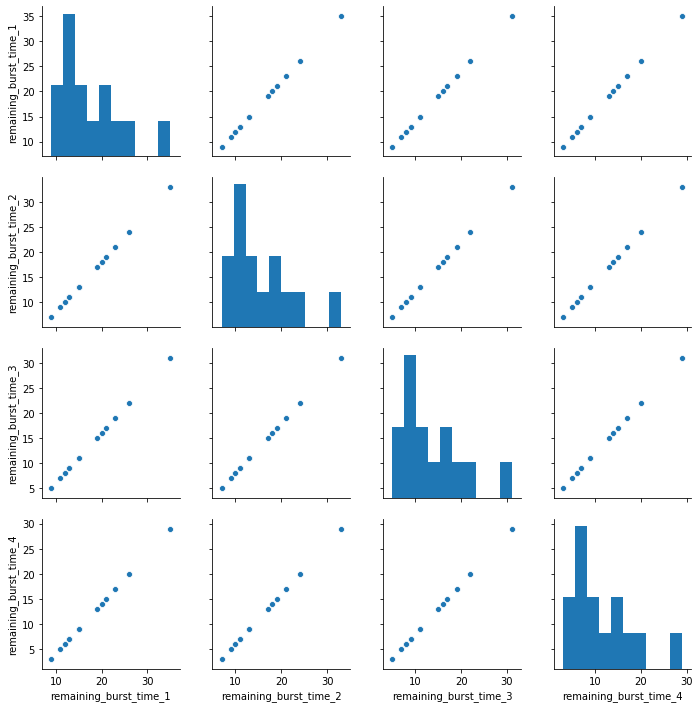

In [19]:
sns.pairplot(df.iloc[:,4:])

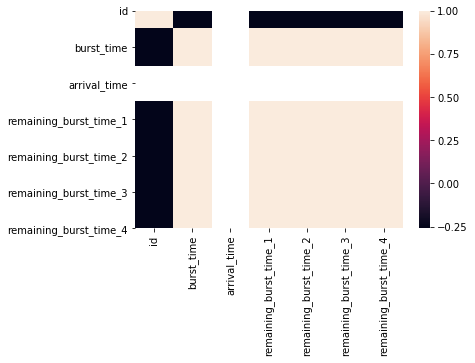

In [20]:
sns.heatmap(df.corr())

In [21]:
# Training 

In [22]:
X = df.iloc[:,4:-1].reset_index(drop=True)
Y = df.iloc[:,-1].reset_index(drop=True)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

In [25]:
lm = LinearRegression()

In [26]:
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
predictions = lm.predict(X_test)

In [28]:
X_test.reset_index(drop=True)

,remaining_burst_time_1,remaining_burst_time_2,remaining_burst_time_3
0,20,18,16
1,12,10,8
2,13,11,9
3,9,7,5
4,15,13,11
5,11,9,7


In [29]:
predictions

array([14.,  6.,  7.,  3.,  9.,  5.])

C:\Users\swathy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  """Entry point for launching an IPython kernel.


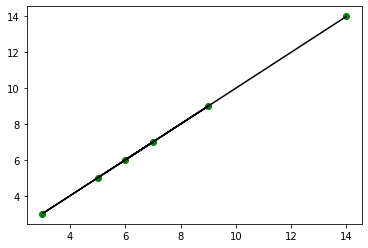

In [30]:
plt.scatter(Y_test, predictions, color='G')
plt.plot(Y_test, predictions,color='k')

In [31]:
# accuracy
lm.score(X,Y)

1.0

In [32]:
# loss functions and they should be least
print('MSE:', metrics.mean_squared_error(Y_test, predictions))

MSE: 1.6303125374567578e-29


# SJF implementation with predicted value

In [33]:
bt=predictions.tolist()     #bt stands for burst time
processes=[0,1,2,3,4,5]
n=len(processes)
for i in range(0,len(bt)-1):  #applying bubble sort to sort process according to their burst time
    for j in range(0,len(bt)-i-1):
        if(bt[j]>bt[j+1]):
            temp=bt[j]
            bt[j]=bt[j+1]
            bt[j+1]=temp
            temp=processes[j]
            processes[j]=processes[j+1]
            processes[j+1]=temp
wt=[]    #wt stands for waiting time
avgwt=0  #average of waiting time
tat=[]    #tat stands for turnaround time
avgtat=0   #average of total turnaround time
wt.insert(0,0)
tat.insert(0,bt[0])
for i in range(1,len(bt)):  
    wt.insert(i,wt[i-1]+bt[i-1])
    tat.insert(i,wt[i]+bt[i])
    avgwt+=wt[i]
    avgtat+=tat[i]
avgwt=float(avgwt)/n
avgtat=float(avgtat)/n
print("\n")
print("Process\t  Burst Time\t  Waiting Time\t  Turn Around Time")
for i in range(0,n):
    print(str(processes[i])+"\t\t"+str(bt[i])+"\t\t"+str(wt[i])+"\t\t"+str(tat[i]))
    print("\n")
print("Average Waiting time is: "+str(avgwt))
print("Average Turn Arount Time is: "+str(avgtat))
    



Process	  Burst Time	  Waiting Time	  Turn Around Time
3		2.9999999999999947		0		2.9999999999999947


5		4.999999999999995		2.9999999999999947		7.999999999999989


1		5.9999999999999964		7.999999999999989		13.999999999999986


2		6.9999999999999964		13.999999999999986		20.999999999999982


4		8.999999999999998		20.999999999999982		29.99999999999998


0		13.999999999999996		29.99999999999998		43.99999999999997


Average Waiting time is: 12.666666666666657
Average Turn Arount Time is: 19.499999999999986


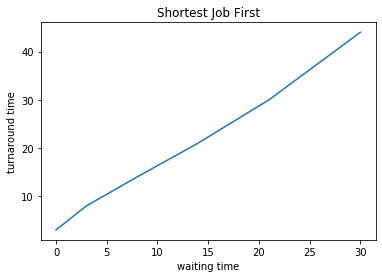

In [34]:
plt.plot(wt,tat)
# naming the x axis
plt.xlabel('waiting time')
# naming the y axis
plt.ylabel('turnaround time')
# giving a title to my graph
plt.title('Shortest Job First')
plt.show() 

#  SJF implementation before prediction

In [35]:
bt= df['burst_time'].head(6).tolist()
bt

[37, 15, 14, 15, 17, 13]

In [36]:
processes=df['name'].head(6).tolist()
processes

['p0', 'p1', 'p2', 'p3', 'p4', 'p5']

In [37]:
#processes
n=len(processes)
for i in range(0,len(bt)-1):  #applying bubble sort to sort process according to their burst time
    for j in range(0,len(bt)-i-1):
        if(bt[j]>bt[j+1]):
            temp=bt[j]
            bt[j]=bt[j+1]
            bt[j+1]=temp
            temp=processes[j]
            processes[j]=processes[j+1]
            processes[j+1]=temp
wt_b=[]    #wt stands for waiting time
avgwt=0  #average of waiting time
tat_b=[]    #tat stands for turnaround time
avgtat=0   #average of total turnaround time
wt_b.insert(0,0)
tat_b.insert(0,bt[0])
for i in range(1,len(bt)):  
    wt_b.insert(i,wt_b[i-1]+bt[i-1])
    tat_b.insert(i,wt_b[i]+bt[i])
    avgwt+=wt_b[i]
    avgtat+=tat_b[i]
avgwt=float(avgwt)/n
avgtat=float(avgtat)/n
print("\n")
print("Process\t  Burst Time\t  Waiting Time\t  Turn Around Time")
for i in range(0,n):
    print(str(processes[i])+"\t\t"+str(bt[i])+"\t\t"+str(wt_b[i])+"\t\t"+str(tat_b[i]))
    print("\n")
print("Average Waiting time is: "+str(avgwt))
print("Average Turn Arount Time is: "+str(avgtat))



Process	  Burst Time	  Waiting Time	  Turn Around Time
p5		13		0		13


p2		14		13		27


p1		15		27		42


p3		15		42		57


p4		17		57		74


p0		37		74		111


Average Waiting time is: 35.5
Average Turn Arount Time is: 51.833333333333336


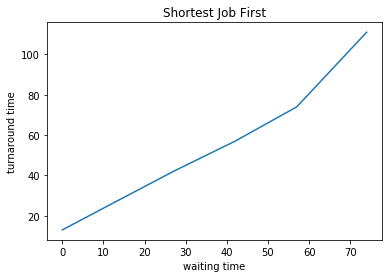

In [39]:
plt.plot(wt_b,tat_b)
# naming the x axis
plt.xlabel('waiting time')
# naming the y axis
plt.ylabel('turnaround time')
# giving a title to my graph
plt.title('Shortest Job First')
plt.show() 

# THANKS